In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
xr.set_options(keep_attrs=True)

from Functions import *

In [2]:
b= 0.023
zR = b / 2     # [m] Rayleigh Range
omega0 = np.sqrt(lambda_355 * zR / np.pi) # [m] Beam radius at the focus
PXe = 25

pulse_params = {'b' : b,            # [m] confocal parameter
            'zR' : zR,           # [m] Rayleigh range
            'omega0' : omega0,   # [m] beam waist at focus
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9}     # [s] single pulse length

harm_params = {'sigma' : 1.5e-50,
            'chi3' : 1.5e-35,
            'PXe' : PXe}
params = {**pulse_params, **harm_params}
initial_vals = (nonzero, nonzero)

zstart = -0.2
zstop = 0.2
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, 1000,dtype = np.longdouble))

rstop = 5*omega0
r = np.linspace(0,rstop,10,dtype = np.longdouble)

sol = solve_diff_eq(dA118_dz_GBNA,params,zrange, initial_vals,z,r)


    

/Users/oliverquinonez/118-Project/Functions.py:68: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  I = scint.quad(Ref,z0,z)


KeyboardInterrupt: 

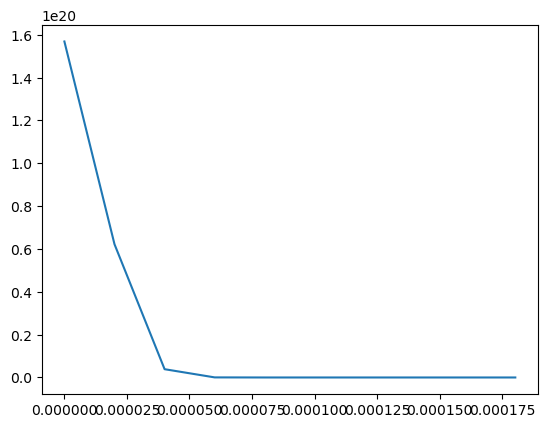

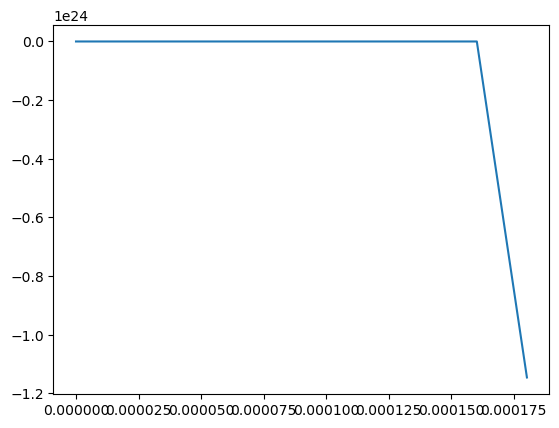

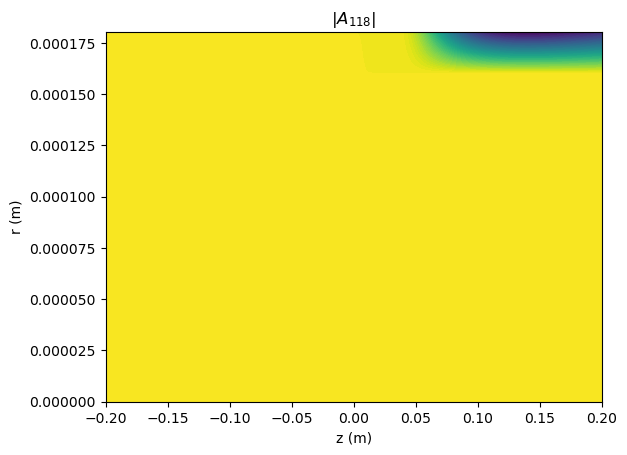

In [5]:
plot1dBeamR(sol.beam_118.data,r,500)
plot1dBeamR(sol.beam_118.data,r,950)

Z,R = np.meshgrid(z,r)
plt.contourf(Z,R,sol.beam_118.data,64)

plt.ylim(0,5*omega0)
plt.xlim(zstart,zstop)
plt.xlabel('z (m)')
plt.ylabel('r (m)')
plt.title("$|A_{118}|$")
plt.show()